In [10]:
# Imports des packages necessaire à l'audit des données

import pandas as pd
import numpy as np

In [11]:
# Chargement du données en mémoire dans un DataFrame
telco_df = pd.read_csv("/Users/igor_laminsi/Documents/data_science_portfolio_projects/"
                 "telcoconnect-churn/data/telco_customer_data_raw.csv")

In [12]:
# Affichage des premières lignes du DataFrame
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST00001,Male,0,No,Yes,3.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,68.61,205.83,Yes
1,CUST00002,Male,1,Yes,No,2.0,Yes,Yes,DSL,No,...,No internet service,Yes,NaN,No,One year,Yes,Bank transfer (automatic),23.15,46.3,No
2,CUST00003,Female,No,No,No,42.0,Yes,Yes,DSL,No,...,No,NaN,Yes,Yes,Month-to-month,No,Electronic check,42.63,1790.46,Yes
3,CUST00004,Female,0,No,Yes,40.0,Yes,Yes,Fiber optic,No,...,Yes,No,No,No internet service,Month-to-month,No,Electronic check,75.04,3001.6,No
4,CUST00005,Male,Yes,Yes,Yes,17.0,Yes,NaN,Fiber optic,Yes,...,Yes,No,No internet service,No,Two year,Yes,Electronic check,22.38,380.46,Yes


In [13]:
# Affichage des dernières lignes du DataFrame
telco_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
69995,CUST69996,Male,1,Yes,Yes,30.0,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Two year,No,Electronic check,74.85,2245.5,No
69996,CUST69997,Male,0,Yes,NaN,15.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),40.67,610.05,Yes
69997,CUST69998,Male,0,NaN,No,20.0,Yes,No,DSL,Yes,...,No,No,NaN,No,Month-to-month,Yes,Mailed check,29.44,588.8,No
69998,CUST69999,Male,0,No,No,21.0,Yes,No,Fiber optic,No,...,No,No,Yes,No internet service,Month-to-month,Yes,Electronic check,46.77,982.17,No
69999,CUST70000,Female,0,No,No,3.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,72.41,217.23,Yes


In [14]:
# Affichage de la quantité de données
telco_df.shape

(70000, 21)

In [15]:
# Affiche des informations essentielles :
# - nombre de lignes et colonnes
# - type de chaque colonne
# - nombre de valeurs non-null par colonne
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        70000 non-null  object 
 1   gender            69252 non-null  object 
 2   SeniorCitizen     69341 non-null  object 
 3   Partner           66470 non-null  object 
 4   Dependents        66435 non-null  object 
 5   tenure            69433 non-null  float64
 6   PhoneService      70000 non-null  object 
 7   MultipleLines     68132 non-null  object 
 8   InternetService   70000 non-null  object 
 9   OnlineSecurity    67078 non-null  object 
 10  OnlineBackup      67253 non-null  object 
 11  DeviceProtection  67106 non-null  object 
 12  TechSupport       67267 non-null  object 
 13  StreamingTV       67173 non-null  object 
 14  StreamingMovies   67215 non-null  object 
 15  Contract          70000 non-null  object 
 16  PaperlessBilling  70000 non-null  object

In [16]:
# Importation des bibliothèques nécessaires pour mesurer l'asymétrie et l'aplatissement des différentes distributions
from scipy.stats import skew, kurtosis

import matplotlib.pyplot as plt

In [17]:
# Définition d'une fonction qui génère un résumé statistique complet pour chaque colonne d'un DataFrame
def better_summary(telco_df):
    summary_data = []

    for col in telco_df.columns:
        col_data = telco_df[col]
        col_summary = {
            "Column": col,
            "Data Type": col_data.dtype,
            "Non-Null Count": col_data.notnull().sum(),
            "Missing Count": col_data.isnull().sum(),
            "Missing %": col_data.isnull().mean() * 100,
            "Unique Count": col_data.nunique()
        }

        if pd.api.types.is_numeric_dtype(col_data):
            col_summary.update({
                "Min": col_data.min(),
                "Max": col_data.max(),
                "Mean": col_data.mean(),
                "Median": col_data.median(),
                "Std Dev": col_data.std(),
                "Skewness": skew(col_data.dropna()),
                "Kurtosis": kurtosis(col_data.dropna())
            })
        else:
            mode = col_data.mode().iloc[0] if not col_data.mode().empty else np.nan
            mode_freq = col_data.value_counts().iloc[0] if not col_data.value_counts().empty else np.nan

            col_summary.update({
                "Top (mode)": mode,
                "Freq": mode_freq
            })

        summary_data.append(col_summary)

    return pd.DataFrame(summary_data).style.format(precision=2).background_gradient(cmap="Blues")

In [18]:
# Exécution de la fonction sur le DataFrame telco_df
summary = better_summary(telco_df)

summary

,Column,Data Type,Non-Null Count,Missing Count,Missing %,Unique Count,Top (mode),Freq,Min,Max,Mean,Median,Std Dev,Skewness,Kurtosis
0,customerID,object,70000,0,0.00,70000,CUST00001,1.00,nan,nan,nan,nan,nan,nan,nan
1,gender,object,69252,748,1.07,7,Female,34110.00,nan,nan,nan,nan,nan,nan,nan
2,SeniorCitizen,object,69341,659,0.94,5,0,52405.00,nan,nan,nan,nan,nan,nan,nan
3,Partner,object,66470,3530,5.04,2,No,38344.00,nan,nan,nan,nan,nan,nan,nan
4,Dependents,object,66435,3565,5.09,2,No,45375.00,nan,nan,nan,nan,nan,nan,nan
5,tenure,float64,69433,567,0.81,75,nan,nan,-10.00,999.00,30.52,20.00,89.87,10.36,108.68
6,PhoneService,object,70000,0,0.00,2,Yes,63011.00,nan,nan,nan,nan,nan,nan,nan
7,MultipleLines,object,68132,1868,2.67,3,Yes,34681.00,nan,nan,nan,nan,nan,nan,nan
8,InternetService,object,70000,0,0.00,3,Fiber optic,38502.00,nan,nan,nan,nan,nan,nan,nan
9,OnlineSecurity,object,67078,2922,4.17,5,No,39195.00,nan,nan,nan,nan,nan,nan,nan


In [20]:
# Import de la bibliothèque pour aider à visualiser les valeurs manquantes
import missingno as msno

In [26]:
# Visualisation des valeurs manquantes
display(telco_df.isna().sum().sort_values(ascending=False))

PaymentMethod       3569
Dependents          3565
Partner             3530
OnlineSecurity      2922
DeviceProtection    2894
StreamingTV         2827
StreamingMovies     2785
OnlineBackup        2747
TechSupport         2733
MultipleLines       1868
TotalCharges        1062
gender               748
SeniorCitizen        659
tenure               567
MonthlyCharges       388
PaperlessBilling       0
customerID             0
Contract               0
InternetService        0
PhoneService           0
Churn                  0
dtype: int64

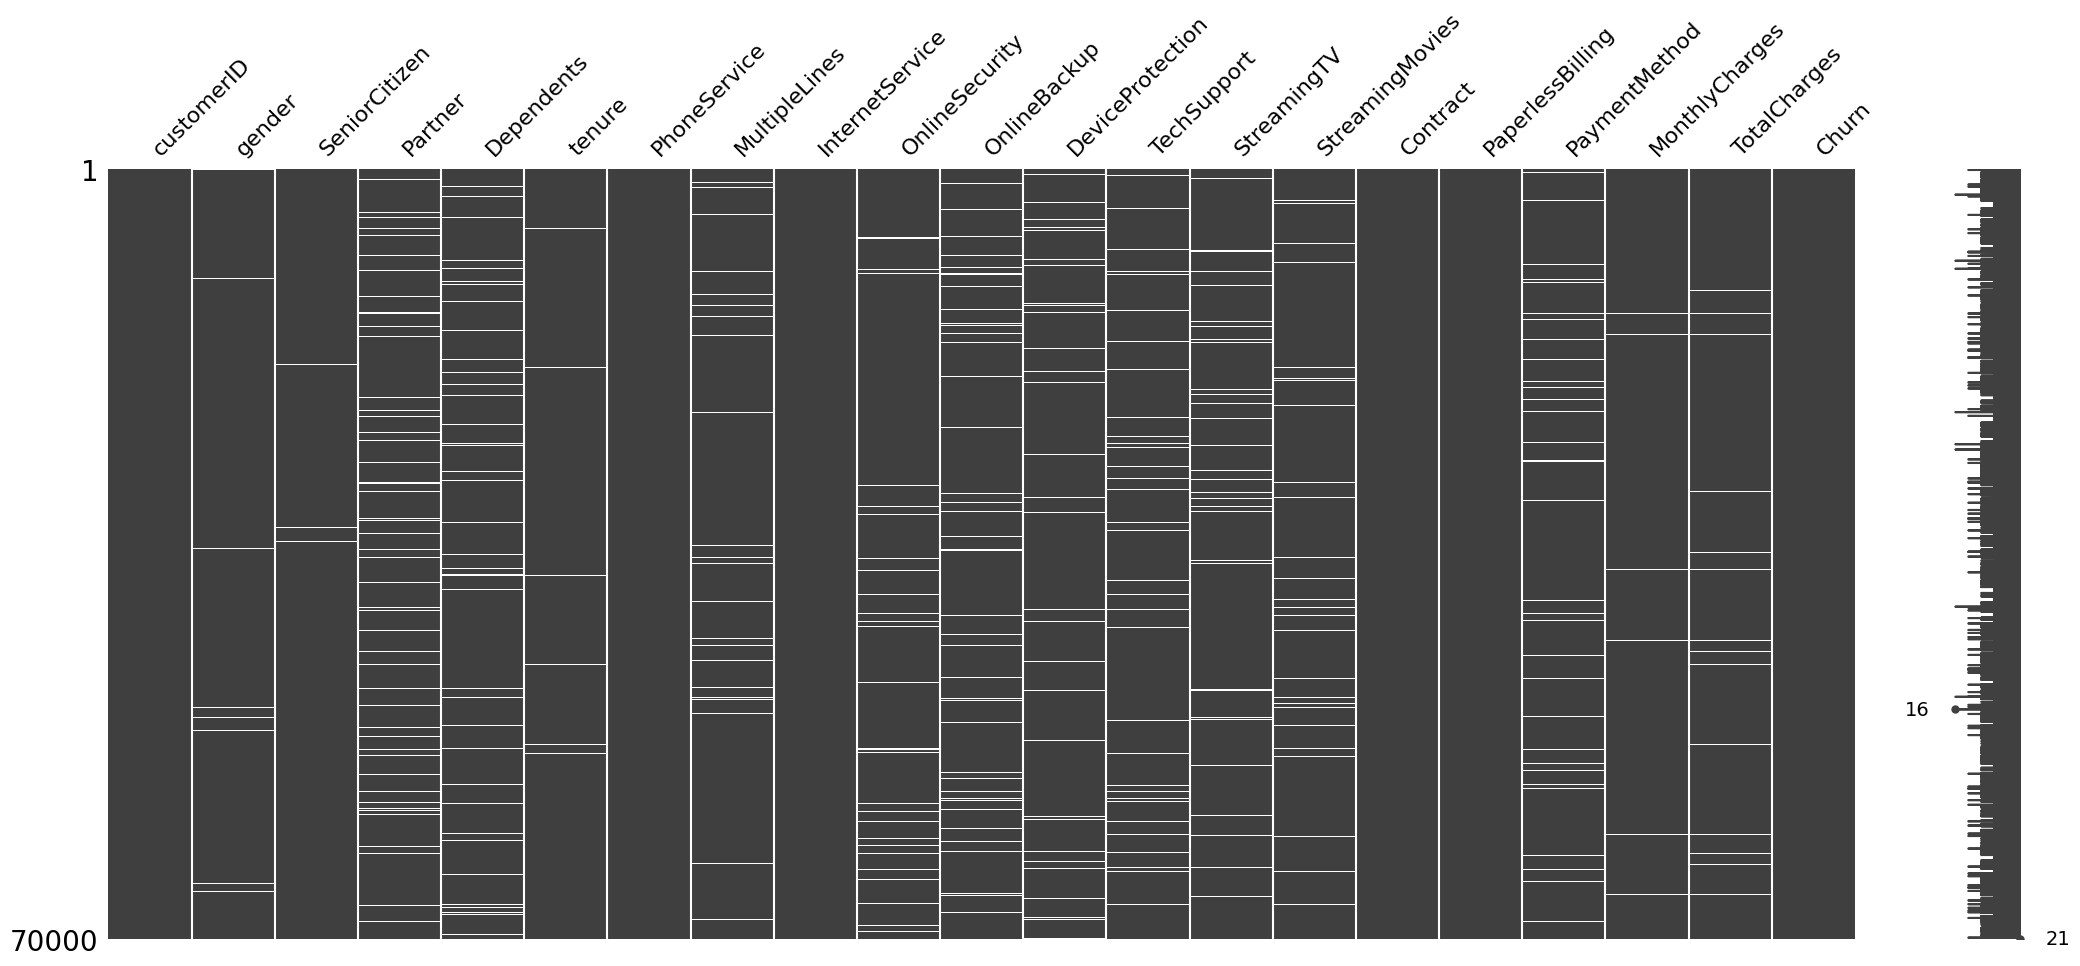

In [27]:
msno.matrix(telco_df)
plt.show()

<Axes: >

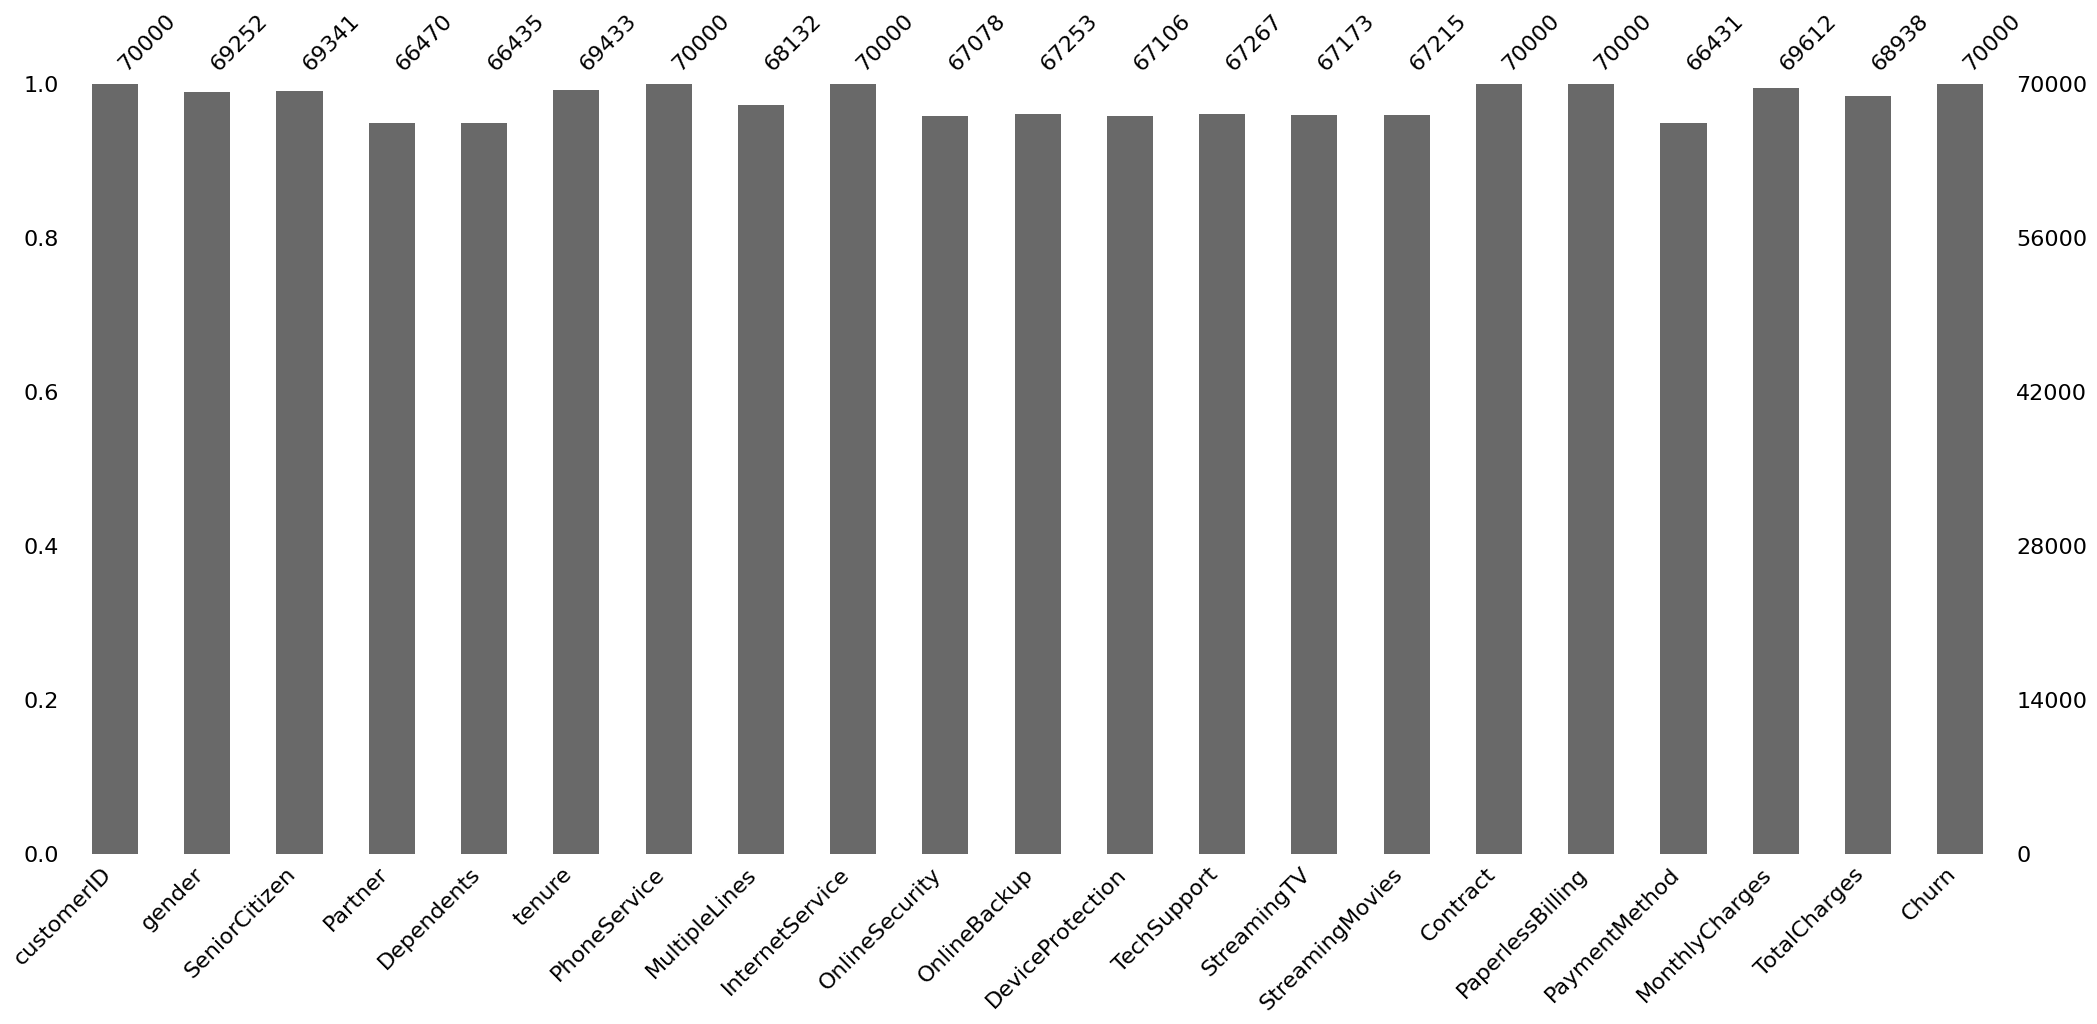

In [28]:
msno.bar(telco_df)

## 📊 Bilan de l’audit des données

Après l’analyse du dataset brut, voici les principaux points à retenir :

---

### 🔧 1. Les données sont globalement très “sales”
Plusieurs colonnes présentent un nombre important de valeurs manquantes.

- Les colonnes avec **≈ 5 % de valeurs manquantes** :
  - **Partner**
  - **Dependents**
  - **PaymentMethod**

- Les colonnes avec **< 5 % de valeurs manquantes** :
  - `gender`, `SeniorCitizen`, `tenure`, `MultipleLines`,  
    `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`,  
    `TechSupport`, `StreamingTV`, `StreamingMovies`,  
    `MonthlyCharges`, `TotalCharges`

- Les autres colonnes **ne contiennent pas de valeurs manquantes**.

---

### ⚠️ 2. Incohérences détectées dans certaines colonnes
Certaines valeurs ne sont pas logique ou réalistes.

- Exemple : la colonne **`tenure`** contient une valeur minimum de **-10**,  
  ce qui est impossible → la tenure représente la durée (en mois) passée chez l’opérateur.

---

### 🔄 3. Types de données incorrects
Certaines colonnes ne sont pas stockées dans le bon format.

- Exemple : **`TotalCharges`** est au format **`object`**,  
  alors qu’elle devrait être au format **`float`**.

---

## 🧹 Quelle est la prochaine étape ?
Dans le notebook **`02_data_cleaning.ipynb`**, je vais :

- corriger les types des colonnes,
- nettoyer les valeurs incohérentes,
- traiter les valeurs manquantes,
- préparer un dataset propre pour l’analyse exploratoire et le modeling.

---
